## Regresión lineal

**Temas Selectos de Modelación Numérica** <br>
Facultad de Ciencias, UNAM <br>
Semestre 2021-2

En este notebook aprenderemos como hacer una regresión lineal por el método de mínimos cuadrados y por el método matricial. 

No olvides resolver los ejercicios de tarea al final del notebook. Entrega tu solución en un notebook en la carpeta de Classroom con el nombre `apellido_nombre_tarea05.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Mínimos cuadrados 

Ajuste de rectas de la forma $y=mx+b$ por mínimos cuadrados. La idea detrás de este método es que queremos encontrar la pendiente $m$ y la ordenada al origen $b$ que nos dan la recta que minimiza la suma de los cuadrados de las distancias entre los puntos (digamos, datos) y la recta ajustada:

![min_cuadrados](min_cuadrados.png)

Es decir, que cuando sumemos el cuadrado de todas las distancias de los puntos a la recta (líneas azules) el valor que obtengamos sea el más pequeño posible (este tipo de problemas se llaman problemas de optimización). 

Se pueden ajustar todo tipo de funciones por este método, no sólo rectas, pero para el caso particular de la recta, se obtiene que la pendiente y la ordenada al origen de la recta que minimiza el cuadrado de las distancias se calcula como:

\begin{align}
\tag{1}
m =\frac{N \sum(x_iy_i) − \sum x_i\sum y_i}{N \sum(x_i^2) − (\sum x_i)^2} \label{eq1}\\
\end{align}

\begin{align}
b = \frac{\sum y_i − m \sum x_i}{N} \tag{2}
\end{align}

en donde $N$ es el número de mediciones o puntos, $x_i$, $y_i$ son las mediciones y las sumas ($\sum$) son sobre todas las mediciones.

**OJO**: Debido a que no es necesario graficar los datos para realizar un ajuste por mínimos cuadrados, se puede caer en errores graves como tratar de ajustar una recta a un conjunto de mediciones cuya relación no es lineal. Por eso **es muy importante graficar** los datos y asegurarse de que la relación entre las variables es lineal antes de aplicar el método de mínimos cuadrados. 

Siguiendo las ecuaciones anteriores definamos una función `reg_lineal` que calcule a pendiente y ordenada al origen de la recta que mejor se ajusta a los "datos" usando el método de mínimos cuadrados:

In [2]:
def reg_lineal(X,Y):
    '''Esta función calcula la pendiente y la ordenada al origen de la recta y=mx+b por mínimos 
    cuadrados a partir de los vectores de mediciones X y Y.
    Input: 
    X - arreglo de numpy 1D
    Y - arreglo de numpy 1D del mismo tamaño que X.
    Output:
    m, b : Escalares, la pendiente y ordenada al origen.
    '''
    N = len(X) # numero de valores del vector X
    sum_xy = np.sum(X*Y) # suma de todos los Xi*Yi
    sum_x = np.sum(X) # suma de todas las X
    sum_y = np.sum(Y) # suma de todas las Y
    sum_x2 = np.sum(X**2) # suma de todas las Xˆ2

    m = ((N*sum_xy) - (sum_x*sum_y)) / ((N*sum_x2) - (sum_x**2))
    b = (sum_y - (m*sum_x)) / N
    return(m, b)

Probemos nuestra función que calcula la regresión lineal. Para ello generamos un vector X y un vector f(X)=Y de la siguiente manera:

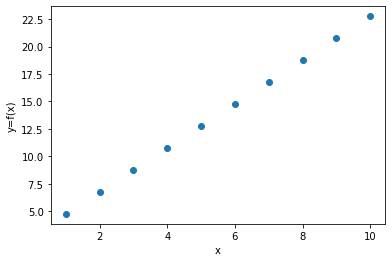

In [3]:
X = np.linspace(1,10,10)
Y = 1 + 2*X + 1*np.random.randn(1) # f(x)=y=1+2x+d 

plt.plot(X,Y,'o')
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

Ahora podemos probar la función `reg_lineal` usando X y Y:

La pendiente m es 2.000000 y la ordenada b es 2.756253


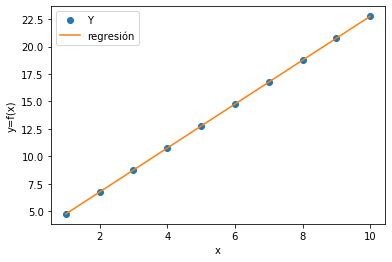

In [4]:
m, b = reg_lineal(X,Y)
print('La pendiente m es %f y la ordenada b es %f' %(m,b))
Y2 = m*X+b

plt.plot(X,Y,'o', label='Y')
plt.plot(X,Y2,'-',label='regresión' )
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.legend()
plt.show()

## 2. Método matricial
(Nota: El material de esta sección fue tomado del blog [cmdlinetips](https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/)) 

También podemos hacer regresiones lineales usando el método matricial. Recordemos que en una regresión lineal queremos ajustar nuestros datos, observaciones, etc. usando el modelo lineal $$y=\beta_0+\beta_1X+\epsilon$$ y estimar los parámetros del modelo $\beta_0$ y $\beta_1$ que son la ordenada al origen y la pendiente, respectivamente.

Podemos combinar las "variables predictivas", en este caso X, en una matriz que tiene un vector columna lleno de unos (lo que multiplica a $\beta_0$) y X (lo que multiplica a $\beta_1$):

In [5]:
X_mat = np.vstack((np.ones(len(X)), X)).T # en este caso usamos la función vstack  
                                          # y el método T (transponer) para obtener las dimensiones 
                                          # adecuadas

Con un poco de álgebra lineal y el objetivo de minimizar el error cuadrático medio del sistema de ecuaciones lineales llegamos a que podemos calcular el valor de los parámetros $\hat{\beta}=(\beta_0, \beta_1)$ de la forma:

$$\hat{\beta}=(X^T. X)^{-1}. X^T. Y$$

Podemos implementar esta ecuación usando las funciones para la inversa de una matriz y multiplicación matricial del módulo de álgebra lineal de numpy `linalg`:

In [6]:
beta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

print('La pendiente beta_1 es %f y la ordenada beta_0 es %f' %(beta[1], beta[0]))

La pendiente beta_1 es 2.000000 y la ordenada beta_0 es 2.756253


que son los mismos valores para la pendiente y ordenada al origen que encontramos usando la función `reg_lineal`. Ahora usemos estos parámetros para estimar los valores de Y:

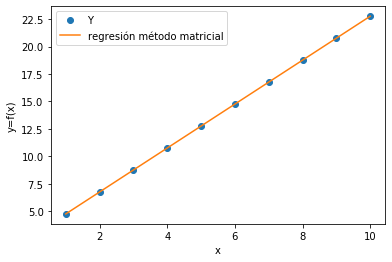

In [7]:
Y_mat = X_mat.dot(beta)

plt.plot(X,Y,'o', label='Y')
plt.plot(X,Y_mat,'-',label='regresión método matricial' )
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.legend()
plt.show()

## 3. Ejemplo usando ambos métodos

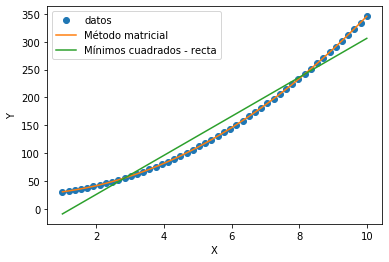

In [8]:
X = np.linspace(1,10)
Y = 1 + 2*X + 3*X**2 + 20*np.random.randn(1)

# Método matricial - ahora tenemos otro término, Xˆ2
X_mat = np.vstack((np.ones(len(X)), X, X**2)).T
beta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)
Y_mat = X_mat.dot(beta)

# Función reg_lineal
m, b = reg_lineal(X,Y)
Y2 = m*X+b

plt.plot(X,Y,'o',label='datos')
plt.plot(X,Y_mat, label='Método matricial')
plt.plot(X,Y2, label='Mínimos cuadrados - recta')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Ups, claramente ajustar los datos a una recta no era una buena idea. Por eso es importante hacer una inspección gráfica de lo que queremos ajustar.

### Ejercicios de tarea:
  
1. Desarrollar las expresiones para la ordenada al origen y la pendiente en una recta usando el método de mínimos cuadrados. (Entregar el desarrollo en un archivo aparte).

2. Programar una función que calcule la regresión de un polinomio de grado 3. En un notebook define la función y puébala usando el polinomio de grado 3 $y = 2x^3+5x^2-11x+7$.